# Classification of exotic fruits

TropicTaste Inc., a leader in the distribution of exotic fruits, aims to improve efficiency and accuracy in the fruit grading process. The goal is to develop a machine learning model that can predict the type of fruit based on numerical characteristics.

The current process of classifying exotic fruits is manual and error-prone, inefficient and resource-intensive. The need for an automated and accurate system is crucial to optimize business operations and maintain high quality standards.

By implementing an automated classification model, TropicTaste Inc. will:

* **Improve operational efficiency:** automating classification will reduce the time and resources required, increasing productivity.
* **Reduce human errors:** a machine learning model will minimize classification errors, ensuring greater accuracy.
* **Optimize inventory:** accurate classification will allow better inventory management, ensuring optimal storage conditions for each type of fruit.
* **Increase customer satisfaction:** a correct identification and classification of fruits will help maintain high quality standards, improving customer satisfaction.

**Project details:**

* **Dataset:** use of a dataset containing various numerical characteristics of different exotic fruits.
* **Algorithm:** implementation of the K-Nearest Neighbors (KNN) algorithm for classification.
* **Output:** the model must correctly predict the type of fruit based on the data provided.

**Project requirements:**

1. **Preparation of the dataset:**
    * Loading and pre-processing of exotic fruit data.
    * Management of missing values, normalization and scaling of data.
2. **Implementation of the KNN model:**
    * Development and training of the KNN model.
    * Parameter optimization to improve predictive accuracy.
3. **Evaluation of performance:**
    * Use of cross-validation techniques to assess the generalizability of the model.
    * Calculation of performance metrics, such as accuracy and classification error.
4. **Display of results:**
    * Create charts to view and compare model performance.
    * Analysis and interpretation of results to identify areas for improvement.

## Variables of the dataset
The dataset can be downloaded from here: https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv.

It contains the following variables:

1. **Frutto:** the type of fruit. This is the target variable (target) that we want to predict.
2. **Peso (g):** the weight of the fruit in grams. Continuous variable.
3. **Diametro medio (mm):** the average diameter of the fruit in millimeters. Continuous variable.
4. **Lunghezza media (mm):** the average length of the fruit in millimetres. Continuous variable.
5. **Durezza buccia (1-10):** the peel hardness of the fruit on a scale from 1 to 10. Continuously variable.
6. **Dolcezza (1-10):** the sweetness of the fruit on a scale from 1 to 10. Continuous variable.
7. **Acidità (1-10):** the acidity of the fruit on a scale from 1 to 10. Continuously variable.

# Environment set up

In [ ]:
# Library import
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

# Set random seed
RANDOM_SEED = 0

# Set seaborn theme
sns.set_theme()

# Data preparation

Let's start by importing the provided dataset and proceed with an initial exploratory analysis.

In [ ]:
# Import dataset from link
DATASET_URL = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/'
df = pd.read_csv(DATASET_URL + 'fruits.csv', index_col = False)
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [ ]:
# Dataset shape (rows, columns)
df.shape

(500, 6)

In [ ]:
# General dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
# Data overview
df.describe()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47.313440,86.573100,5.298620,7.437640,3.593220
std,26.768797,64.293403,2.641993,1.812548,1.264899
min,8.570000,7.530000,1.150000,3.070000,1.250000
25%,24.797500,50.510000,2.672500,6.152500,2.570000
50%,42.380000,70.450000,5.670000,7.340000,3.535000
75%,68.080000,88.852500,7.455000,8.615000,4.465000
max,111.210000,299.890000,11.140000,13.720000,6.950000


In [ ]:
# Check for duplicate records
df.duplicated().sum()

np.int64(0)

The imported dataset consists of 500 records consisting of the features **"Frutto"**, **"Peso (g)"**, **"Diametro medio (mm) (mm)"**, **"Lunghezza media (mm)"**, **"Durezza buccia (1-10)"**, **"Dolcezza (1-10)"**. There is no feature "Acidità (1-10)", previously declared in the presentation of the project.

From a first analysis, with the exception of the target variable "Fruit", all variables are numerical. In addition, there are no null fields and duplicate records.

## Check for outlier

We proceed to verify the presence of outliers within the dataset:

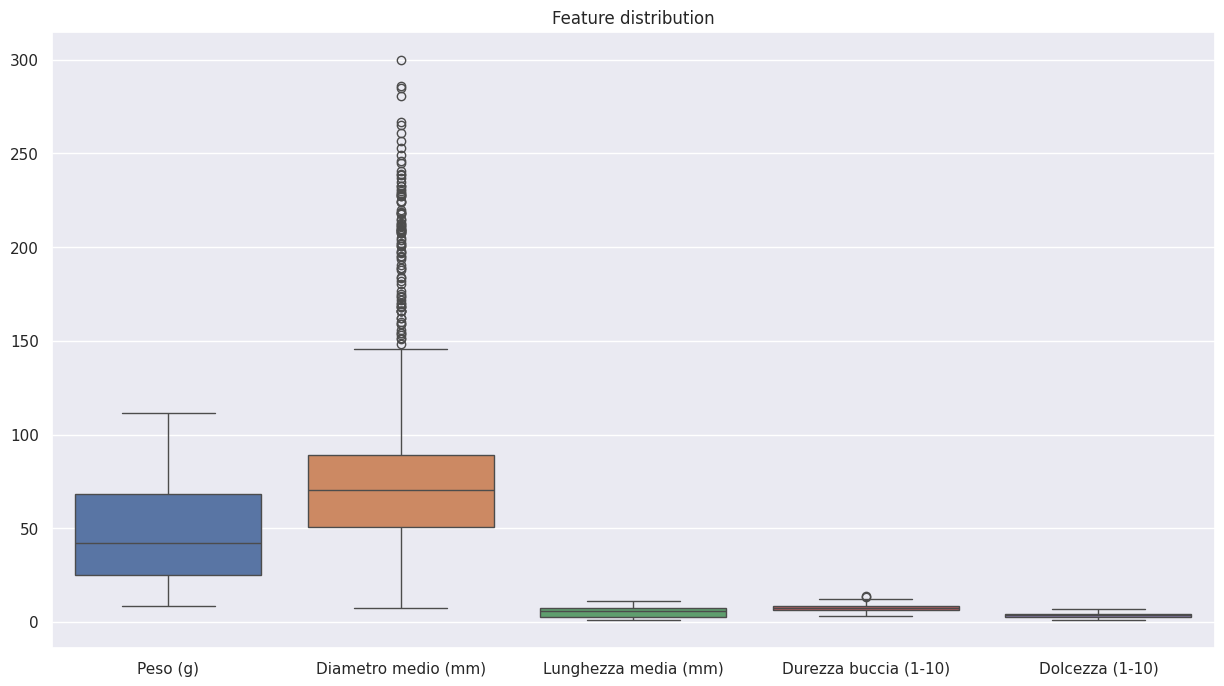

In [ ]:
# Check for outliers
plt.figure(figsize=(15, 8))

# Title
plt.title('Feature distribution')

sns.boxplot(data=df)
plt.show()

It is evident that the features "Peso (g)" e "Diametro medio (mm)" show the most significant variability and have a larger range of values. "Diametro medio (mm)", in particular, has a substantial number of high outliers.

## Target distribution and encoding

Let’s now check the target variable ("Frutto") balance:

<Axes: title={'center': '"Frutto" distribution'}, xlabel='Frutto'>

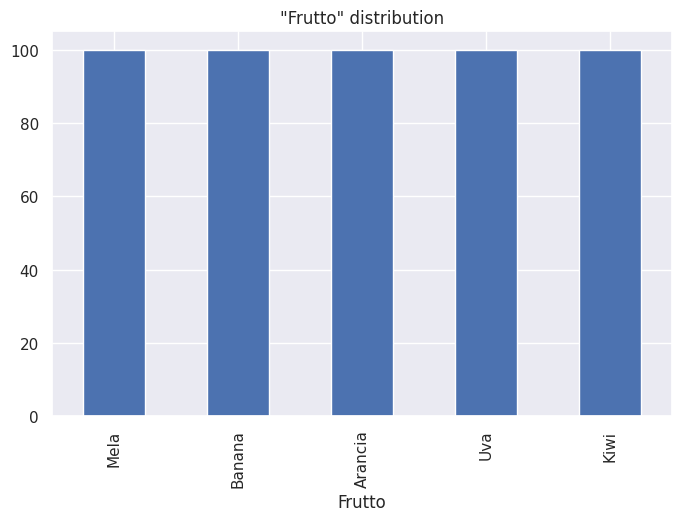

In [ ]:
# Target variable (Frutto) distribution
df['Frutto'].value_counts().plot(kind='bar', figsize=(8, 5), title='"Frutto" distribution')

The target variable is perfectly balanced and consists of five fruit categories: *Mela*, *Banana*, *Arancia*, *Uva* and *Kiwi*.

Because it is a field of type string, we proceed to convert in numerical value by fetaure ancoding.

In [ ]:
# Feature encoding of the target variable
encoder = LabelEncoder()
df['Frutto_encoded'] = encoder.fit_transform(df['Frutto'])
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10),Frutto_encoded
0,Mela,86.40,89.68,8.69,9.61,2.41,3
1,Mela,77.58,73.45,6.49,7.20,3.87,3
2,Mela,81.95,81.66,6.40,9.09,2.88,3
3,Mela,66.33,36.71,6.78,8.21,2.55,3
4,Mela,56.73,75.69,5.78,9.15,3.88,3


In [ ]:
# Generate dict for Frutto encoding

fruit_enc = dict()

mapping_df = df[['Frutto', 'Frutto_encoded']]
unique_mapping_df = mapping_df.drop_duplicates(ignore_index=True)
unique_mapping_df[['Frutto','Frutto_encoded']].to_dict(orient='list')

for i, j in zip(unique_mapping_df['Frutto'], unique_mapping_df['Frutto_encoded']):
    fruit_enc.setdefault(j,i)

fruit_enc

{3: 'Mela', 1: 'Banana', 0: 'Arancia', 4: 'Uva', 2: 'Kiwi'}

In [ ]:
# Replace original feature "Frutto" with the encoded one
df['Frutto'] = df['Frutto_encoded']
df = df.drop(['Frutto_encoded'], axis=1)
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,3,86.40,89.68,8.69,9.61,2.41
1,3,77.58,73.45,6.49,7.20,3.87
2,3,81.95,81.66,6.40,9.09,2.88
3,3,66.33,36.71,6.78,8.21,2.55
4,3,56.73,75.69,5.78,9.15,3.88


Now we have an encoded value for the feature "Frutto" in the original dataset and also a dictionary (*fruit_enc*) that shows the correspondence between the new coded value of the field and its original value.

## Feature distribution


Let us now carry out a study of the other features: let us look at the distribution of the various fields in detail:

### Peso

<Axes: title={'center': 'Peso (g)'}, xlabel='Peso (g)', ylabel='Quantity'>

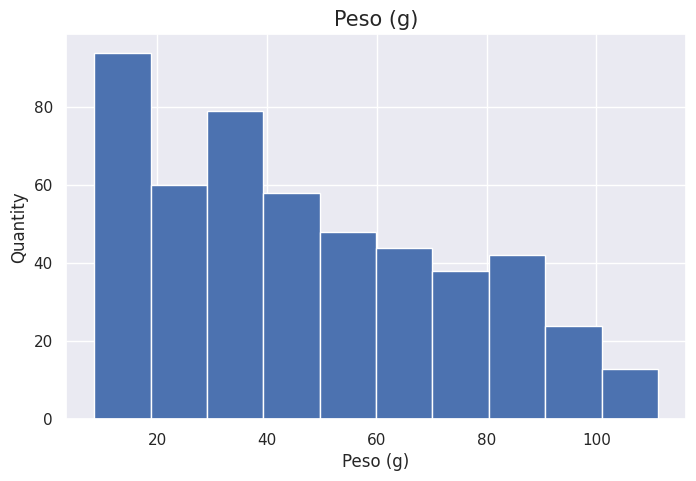

In [ ]:
# Peso (g)

# Title and lables
ax = plt.axes()
ax.set_title('Peso (g)', size=15)
ax.set_xlabel('Peso (g)')
ax.set_ylabel('Quantity')

df['Peso (g)'].hist(figsize=(8, 5))

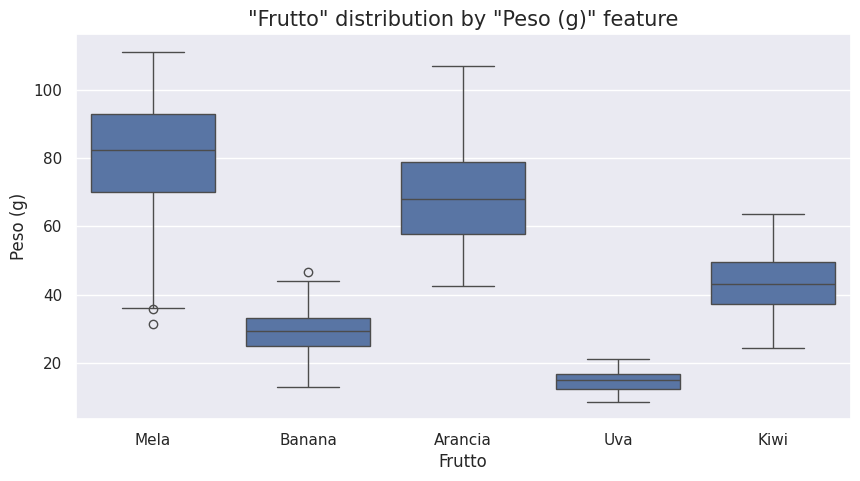

In [ ]:
# Peso (g) -  Distribution by "Frutto"

plt.figure(figsize=(10, 5))

sns.boxplot(
    x=df['Frutto'].map(fruit_enc),
    y=df['Peso (g)'],
)

plt.title('"Frutto" distribution by "Peso (g)" feature', size=15)
plt.xlabel('Frutto')
plt.ylabel('Peso (g)')
plt.show()

### Diametro medio

<Axes: title={'center': 'Diametro medio (mm)'}, xlabel='Diametro medio (mm)', ylabel='Quantity'>

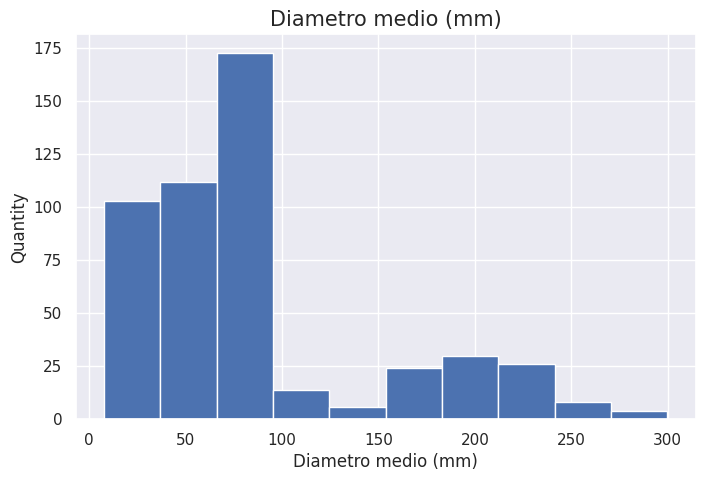

In [ ]:
# Diametro medio (mm) -  Distribution

# Title and lables
ax = plt.axes()
ax.set_title('Diametro medio (mm)', size=15)
ax.set_xlabel('Diametro medio (mm)')
ax.set_ylabel('Quantity')

df['Diametro medio (mm)'].hist(figsize=(8, 5))

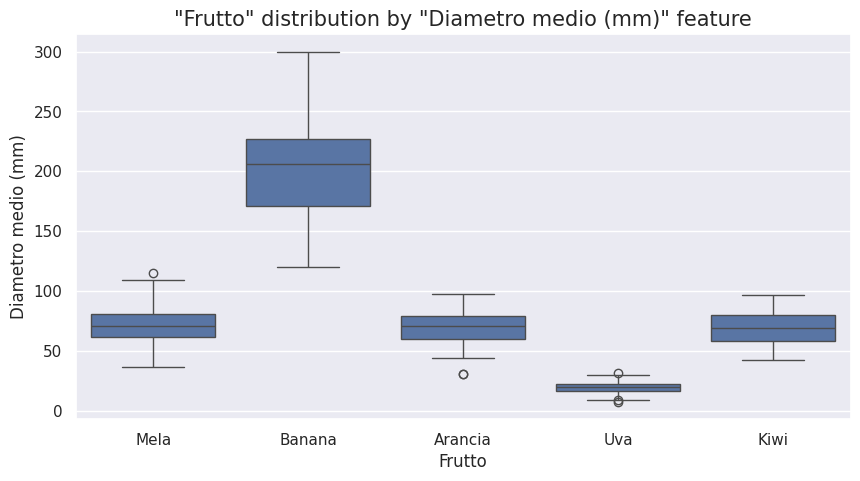

In [ ]:
# Diametro medio (mm) -  Distribution by "Frutto"

plt.figure(figsize=(10, 5))

sns.boxplot(
    x=df['Frutto'].map(fruit_enc),
    y=df['Diametro medio (mm)'],
)

plt.title('"Frutto" distribution by "Diametro medio (mm)" feature', size=15)
plt.xlabel('Frutto')
plt.ylabel('Diametro medio (mm)')
plt.show()

### Lunghezza media

<Axes: title={'center': 'Lunghezza media (mm)'}, xlabel='Lunghezza media (mm)', ylabel='Quantity'>

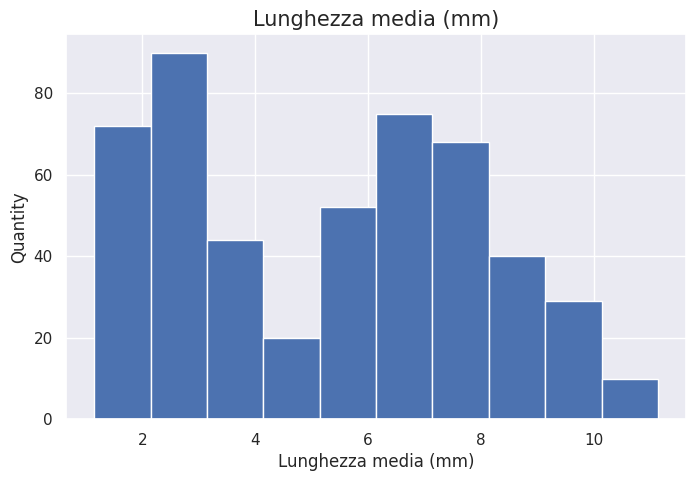

In [ ]:
# Lunghezza media (mm)

# Title and lables
ax = plt.axes()
ax.set_title('Lunghezza media (mm)', size=15)
ax.set_xlabel('Lunghezza media (mm)')
ax.set_ylabel('Quantity')

df['Lunghezza media (mm)'].hist(figsize=(8, 5))

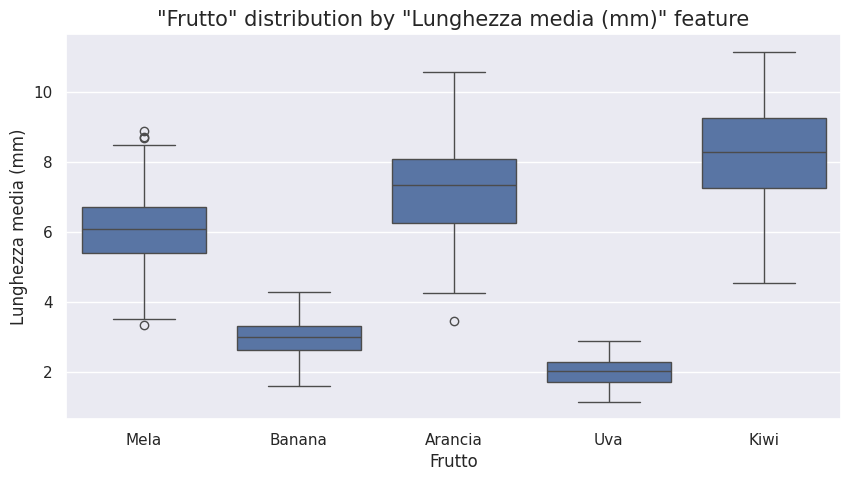

In [ ]:
# Lunghezza media (mm) -  Distribution by "Frutto"

plt.figure(figsize=(10, 5))

sns.boxplot(
    x=df['Frutto'].map(fruit_enc),
    y=df['Lunghezza media (mm)'],
)

plt.title('"Frutto" distribution by "Lunghezza media (mm)" feature', size=15)
plt.xlabel('Frutto')
plt.ylabel('Lunghezza media (mm)')
plt.show()

### Durezza buccia

<Axes: title={'center': 'Durezza buccia (1-10)'}, xlabel='Durezza buccia (1-10)', ylabel='Quantity'>

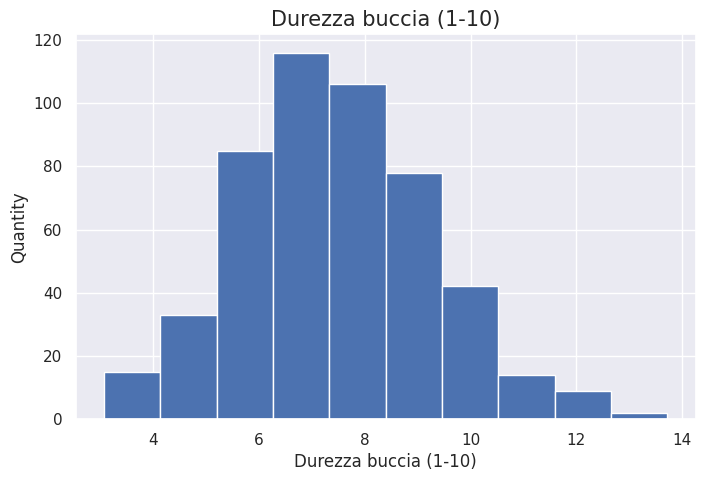

In [ ]:
# Durezza buccia (1-10)

# Title and lables
ax = plt.axes()
ax.set_title('Durezza buccia (1-10)', size=15)
ax.set_xlabel('Durezza buccia (1-10)')
ax.set_ylabel('Quantity')

df['Durezza buccia (1-10)'].hist(figsize=(8, 5))

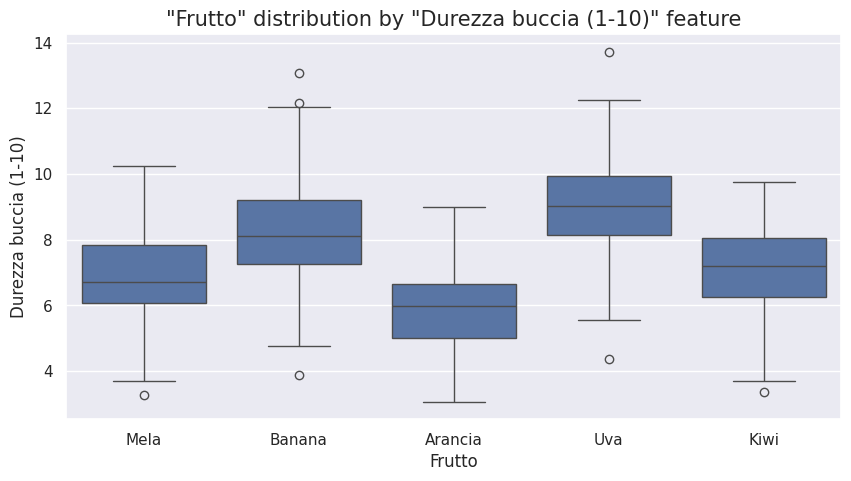

In [ ]:
# Durezza buccia (1-10) -  Distribution by "Frutto"

plt.figure(figsize=(10, 5))

sns.boxplot(
    x=df['Frutto'].map(fruit_enc),
    y=df['Durezza buccia (1-10)'],
)

plt.title('"Frutto" distribution by "Durezza buccia (1-10)" feature', size=15)
plt.xlabel('Frutto')
plt.ylabel('Durezza buccia (1-10)')
plt.show()

### Dolcezza

<Axes: title={'center': 'Dolcezza (1-10)'}, xlabel='Dolcezza (1-10)', ylabel='Quantity'>

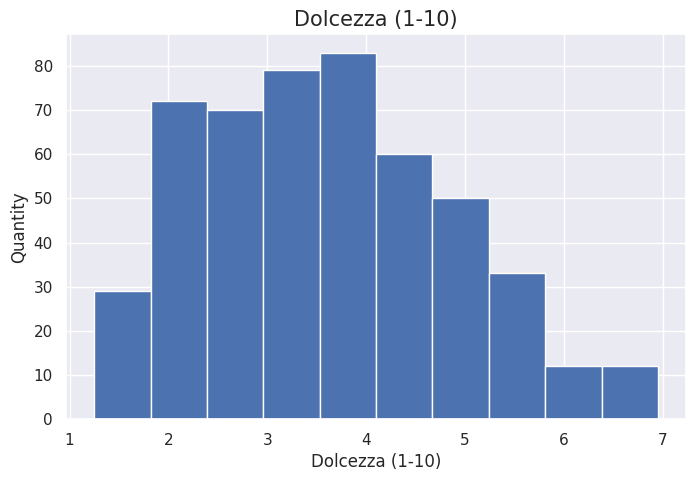

In [ ]:
# Dolcezza (1-10)

# Title and lables
ax = plt.axes()
ax.set_title('Dolcezza (1-10)', size=15)
ax.set_xlabel('Dolcezza (1-10)')
ax.set_ylabel('Quantity')

df['Dolcezza (1-10)'].hist(figsize=(8, 5))

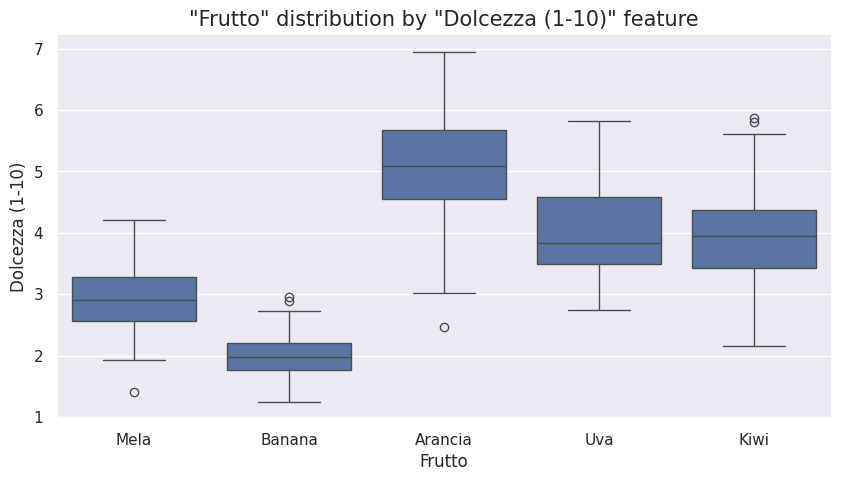

In [ ]:
# Dolcezza (1-10) -  Distribution by "Frutto"

plt.figure(figsize=(10, 5))

sns.boxplot(
    x=df['Frutto'].map(fruit_enc),
    y=df['Dolcezza (1-10)'],
)

plt.title('"Frutto" distribution by "Dolcezza (1-10)" feature', size=15)
plt.xlabel('Frutto')
plt.ylabel('Dolcezza (1-10)')
plt.show()

## Correlation matrix

Now lets generate the correlation matrix to understand which fields are most important for the target variable.

<Axes: title={'center': 'Correlation matrix\n'}>

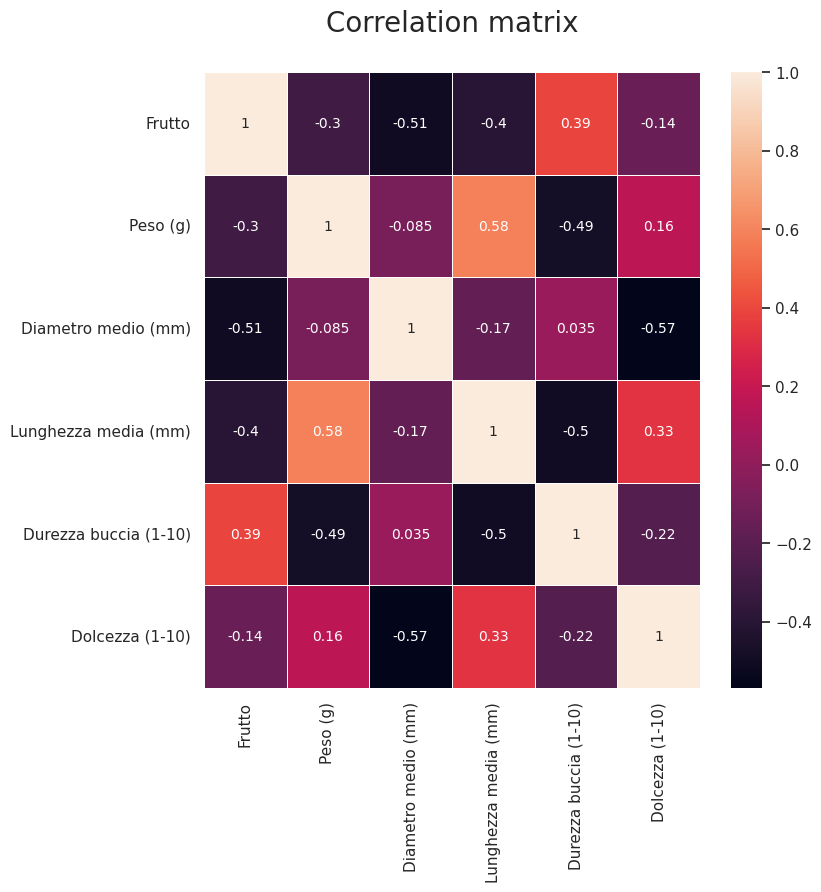

In [ ]:
# Plot correlation matrix

plt.figure(figsize=(8, 8))

# Title
ax = plt.axes()
ax.set_title('Correlation matrix\n', size = 20)

sns.heatmap(df.corr(),
    annot = True,
    xticklabels = list(df.columns),
    yticklabels = list(df.columns),
    linewidth = 0.5,
    annot_kws = {'size': 10})

From the correlation matrix it is possible to note the existence of a direct (*positive*) correlation between the target variable "Fruit" and the feature "Durezza buccia (1-10)" and an inverse (*negative*) correlation between the target variable and the features "Lunghezza media (mm)" and "Diametro medio (mm)".

## Dataset split (train - test)

As the graphs show, the features are located on scales of values very different from each other, so it will be necessary to standardize them.



In [ ]:
X = df.drop('Frutto', axis=1)
y = df['Frutto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [ ]:
X_train.shape

(350, 5)

In [ ]:
X_test.shape

(150, 5)

In [ ]:
y_train.shape

(350,)

In [ ]:
y_test.shape

(150,)

In [ ]:
# Standardize data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Model implementation and tuning

We now implement a **K-Nearest Neighbors** (*KNN*) model for classifying various fruits.
At the same time, we carry out a study of the '*K*' parameter to optimize the performance of the model using the *accuracy* and *log loss* parameters as a reference.

The accuracy score in particular gives us an idea of how accurate the model is in its predictions, answering the question: *how many of the fruits in the dataset have been classified correctly?*.

The log loss, on the other hand, gives us an idea of the margin of error of the model, indicating *how many of the predictions made are wrong*.

The objective is to find a good compromise between these two metrics, minimizing the log loss (fewer errors), but without having too high an accuracy score (overfitting).

In [ ]:
# K value tuning

Ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for K in Ks:

  print(f'K={K}')

  knn = KNeighborsClassifier(n_neighbors=K)
  knn.fit(X_train, y_train)

  y_pred_train = knn.predict(X_train)
  y_proba_train = knn.predict_proba(X_train)

  y_pred_test = knn.predict(X_test)
  y_proba_test = knn.predict_proba(X_test)

  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  log_train = log_loss(y_train, y_proba_train)
  log_test = log_loss(y_test, y_proba_test)

  print(f'ACCURACY: TRAIN={accuracy_train:.2f} - TEST={accuracy_test:.2f}')
  print(f'LOG LOSS: TRAIN={log_train:.2f} - TEST={log_test:.2f}\n')

K=1
ACCURACY: TRAIN=1.00 - TEST=0.91
LOG LOSS: TRAIN=0.00 - TEST=3.12

K=2
ACCURACY: TRAIN=0.95 - TEST=0.84
LOG LOSS: TRAIN=0.06 - TEST=2.49

K=3
ACCURACY: TRAIN=0.96 - TEST=0.89
LOG LOSS: TRAIN=0.10 - TEST=1.10

K=4
ACCURACY: TRAIN=0.93 - TEST=0.87
LOG LOSS: TRAIN=0.11 - TEST=0.65

K=5
ACCURACY: TRAIN=0.94 - TEST=0.87
LOG LOSS: TRAIN=0.13 - TEST=0.66

K=10
ACCURACY: TRAIN=0.93 - TEST=0.89
LOG LOSS: TRAIN=0.15 - TEST=0.21

K=20
ACCURACY: TRAIN=0.94 - TEST=0.93
LOG LOSS: TRAIN=0.19 - TEST=0.20

K=30
ACCURACY: TRAIN=0.94 - TEST=0.91
LOG LOSS: TRAIN=0.21 - TEST=0.22

K=40
ACCURACY: TRAIN=0.93 - TEST=0.93
LOG LOSS: TRAIN=0.23 - TEST=0.24

K=50
ACCURACY: TRAIN=0.92 - TEST=0.93
LOG LOSS: TRAIN=0.25 - TEST=0.26

K=60
ACCURACY: TRAIN=0.93 - TEST=0.95
LOG LOSS: TRAIN=0.27 - TEST=0.29

K=70
ACCURACY: TRAIN=0.92 - TEST=0.94
LOG LOSS: TRAIN=0.32 - TEST=0.34

K=80
ACCURACY: TRAIN=0.93 - TEST=0.94
LOG LOSS: TRAIN=0.38 - TEST=0.41

K=90
ACCURACY: TRAIN=0.93 - TEST=0.92
LOG LOSS: TRAIN=0.46 - TEST=0.4

The value K=1 predictably leads to an overfitting situation on the training dataset.

Observing the training data only, already starting from K=2 we can notice a clear improvement in the accuracy metric and a more gradual improvement in the log loss value. The trend is confirmed up to a value of K=60, after which the log loss tends to accentuate significantly. This trend is also reflected in the test data with slight differences due to the generalization of the model.

We therefore identify the **range 1 < K < 70** as the search range for the best K value.

## Cross validation

We cross-validate the model and serach for the best '*K*' parameter to set:

In [ ]:
# Cross validation with GridSearchCV method

param_grid = {'n_neighbors': list(range(2, 70))}
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

X = df.drop('Frutto', axis=1)
y = df['Frutto']
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=100),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]},
             scoring='accuracy')

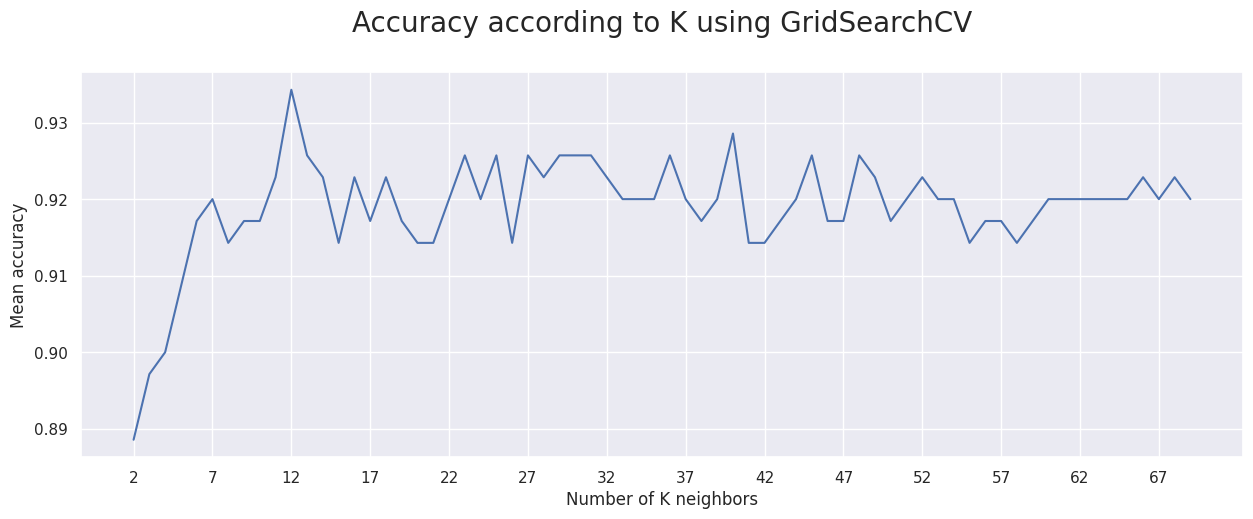

In [ ]:
# Plot of accuracy score by GridSearchCV

results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(15, 5))

plt.plot(
    results['param_n_neighbors'],
    results['mean_test_score'])

plt.xlabel('Number of K neighbors')
plt.ylabel('Mean accuracy')
plt.title('Accuracy according to K using GridSearchCV\n', size=20)
plt.xticks(np.arange(2, 70, 5))
plt.grid(True)
plt.show()

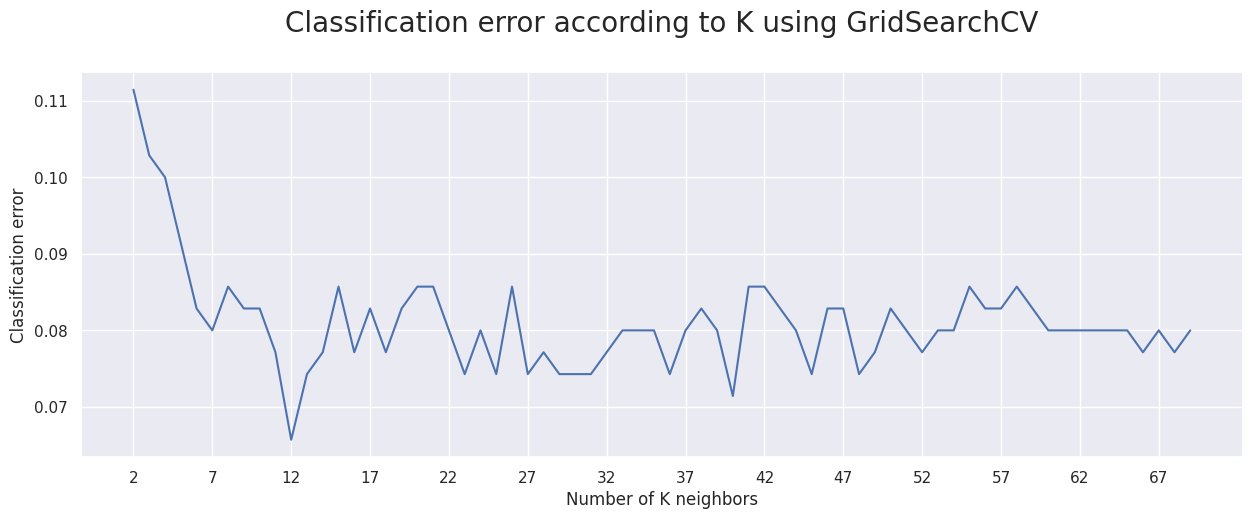

In [ ]:
# Plot of classification error score by GridSearchCV

results['classification_error'] = 1 - results['mean_test_score']

plt.figure(figsize=(15, 5))

plt.plot(
    results['param_n_neighbors'],
    results['classification_error'])

plt.xlabel('Number of K neighbors')
plt.ylabel('Classification error')
plt.title('Classification error according to K using GridSearchCV\n', size=20)
plt.xticks(np.arange(2, 70, 5))
plt.grid(True)
plt.show()

According to the graphs, we can see that, with a value of **K=12**, the model reaches its peak performance, maximizing accuracy and minimizing the margin of error.

## Model fit

Fitting the model with the best '*K*' value founded:

In [ ]:
# Fit the model with teh best K value

knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

## Classification report

Now let's check the classification report of the main metrics of the model:

In [ ]:
# Classification report
y_pred = knn.predict(X_test)
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        31
           1       1.00      1.00      1.00        27
           2       0.94      0.86      0.90        35
           3       0.86      0.96      0.91        26
           4       1.00      1.00      1.00        31

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



# Display of results

Finally, let’s check performance related to classifications with a confusion matrix:

Text(41.25, 0.5, 'Actual value')

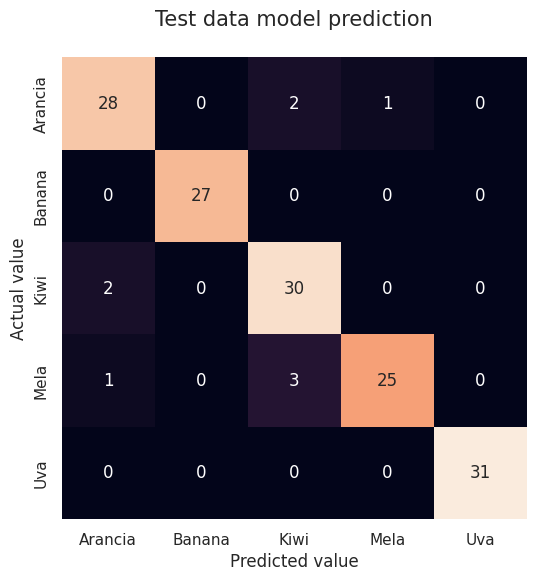

In [ ]:
# Plot prediction in a confusion matrix

plt.figure(figsize=(6, 6))

cm = confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(df_cm, annot=True, cbar=False)
plt.title('Test data model prediction\n', size=15)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

Based on the results reported by the test dataset, the model appears to work perfectly for the classification of bananas and grapes.
a
As for the other fruits:
- Of 31 oranges, 3 have been missclassified: 2 as kiwis and 1 as apple;
- Of 35 kiwis, 5 have been missclassified: 3 as apples and 2 as oranges;
- Of 26 apples, 1 was misclassified as orange.

These classification errors are due to the fact that, as observed in the analysis of the distribution of the features, bananas, kiwis and apples have quite **common features**, especially regarding the *average diameter* and the *average length*. For this reason the model tends to have an higher degree of uncertainty in classifying these fruits.

# Conclusions

The project successfully addressed the challenge of classifying exotic fruits for TropicTaste Inc. by developing a K-Nearest Neighbors (KNN) model. Through a methodical process, we established a workflow that began with the exploratory analysis of the '*fruits.csv*' dataset, followed by crucial data preprocessing steps, including feature scaling and label encoding, to prepare the data for the machine learning model.

The implemented KNN model, after hyperparameter tuning with GridSearchCV to determine the optimal number of neighbors (k), demonstrated strong predictive capabilities. The model achieved a final test accuracy of **0.94**, indicating that it can correctly classify 94% of new, unseen exotic fruits. This high accuracy score, validated by cross-validation, suggests that the model is not overfitted and possesses excellent generalization ability.

A detailed analysis of the confusion matrix provided further insights into the model's performance. The results showed that the model is highly effective at identifying the distinct characteristics of most fruit types, with a near-perfect classification rate for several categories. The analysis also highlighted a subtle degree of confusion between a few specific fruit types, indicating that these fruits share similar feature profiles.

In summary, the developed KNN model provides a reliable and efficient solution for the automated classification of exotic fruits. This tool can significantly improve the accuracy and speed of sorting processes for TropicTaste Inc., meeting the initial project requirements for a high-performing and robust classification system.